## Regression 迴歸
#### 監督式學習，答案有大小關係 (連續) 
- 使用決策樹來訓練模型；因為sklearn採CART決策樹，因此也可用在迴歸問題上
- CART決策樹: 每次只劃分2個子節點

> #### 步驟一: 載入資料集，用pandas以表格呈現

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston["data"],
                  columns=boston["feature_names"])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


> #### 步驟二: 將資料切分兩部分: 拿來訓練的 和 拿來測試的

In [2]:
from sklearn.model_selection import train_test_split

# test_size 多少部分要拿來測試
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"], 
                                                    boston["target"], 
                                                    test_size=0.1)

> #### 步驟三: 使用DecisionTreeRegressor來訓練模型
> #### 步驟六: 用驗證分數修正max_depth

In [3]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6)
# 用之後的驗證分數回頭調整max_depth

# fit學習
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

> #### 步驟四: 用第三方軟體Graphviz將決策樹畫出來

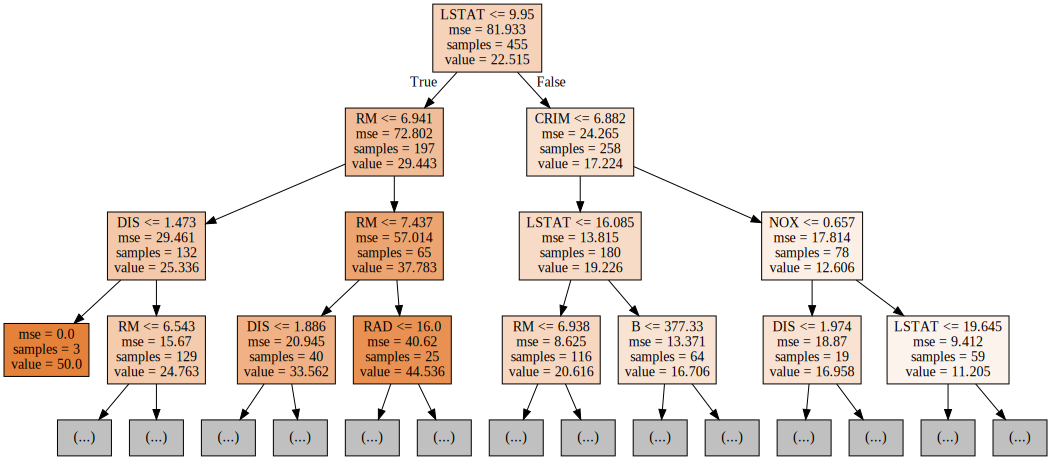

In [4]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, 
                    feature_names=boston["feature_names"],
                    max_depth=3,
                    filled=True)
# 這裡的max_depth只是呈現出的深數，不是實際深度
graphviz.Source(g)

> #### 步驟五: 利用測試資料，驗證模型的正確率

In [5]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
# 預測結果 -> 葉節點value => 看落到哪塊區域，該區域的平均值

r2_score(y_test, pre)

0.8800868402044204

### MSE (mean square error)
集中程度(跟平均的平均距離) = (誤差範圍) -> (1/n)∑$(x-平均)^2$
- MSE越小越好

### RMSE 
RMSE = √MSE
- RMSE較MSE更具物理意義
- 對於誤差較大的點懲罰較MAE重
- 問題: 兩筆資料無法進行對比，因為基數不一樣

### MAE
MAE = (1/n)∑|預測 - 正確|

### R square score
- 0~1之間，0.5up較佳

#### 弄清楚各種衡量標準的應用時機
- 準不準 -> R square score
- 差多少 -> RMSE 